# Machine learning - 2nd practice project

### World Happiness Report Project 

-- Project Description

   The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness..

-- Tasks

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.


"..You need to predict the happiness score considering all the other factors mentioned in the dataset.."

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [32]:
happy = pd.read_csv("C:/Users/user/Downloads/happiness_score_dataset.csv")
happy

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

In [3]:
happy.shape

(158, 12)

In [4]:
happy.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [6]:
happy.tail()

Country                           Region  Happiness Rank  \
153   Rwanda               Sub-Saharan Africa             154   
154    Benin               Sub-Saharan Africa             155   
155    Syria  Middle East and Northern Africa             156   
156  Burundi               Sub-Saharan Africa             157   
157     Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726

In [7]:
#Checking for null values
happy.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<Axes: >

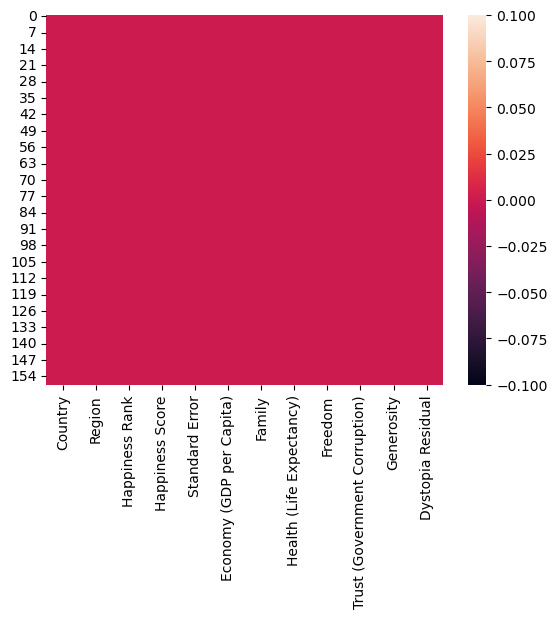

In [8]:
#Visually checking for null values
sns.heatmap(happy.isnull())

No Missing values in the above dataset..

In [9]:
#Checking for Duplicates
happy.duplicated().sum()

0

We have no duplicate values in the dataset...therefore no need to drop any row

In [10]:
#Checking for dataset info
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [11]:
#Checking the number of unique values of each column
happy.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

## Univariate Analysis (Graphical and Non-Graphical) 

In [12]:
happy.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

So, from the above description of data, we observe that..

1. The difference between the third quartile and the max value is not so high in any of the features..therefore it is highly unlikely that we have outliers present..
2. As we know that, if mean > median = right skewed; mean < median = left skewed. And from the above data, we can see that out   of our 9 features(excluding 'Happiness rank') 5 of them are right skewed and 4 of them are left skewed. They are not skewed too much to the right or left either..as the values are not so greater to each other..

As 'Happiness rank' does not contribute much in the prediction of the 'Happiness score', we can drop that particular column..

In [33]:
#Droping the column
happy.drop('Happiness Rank', axis=1, inplace = True)

## Bivariate Analysis 

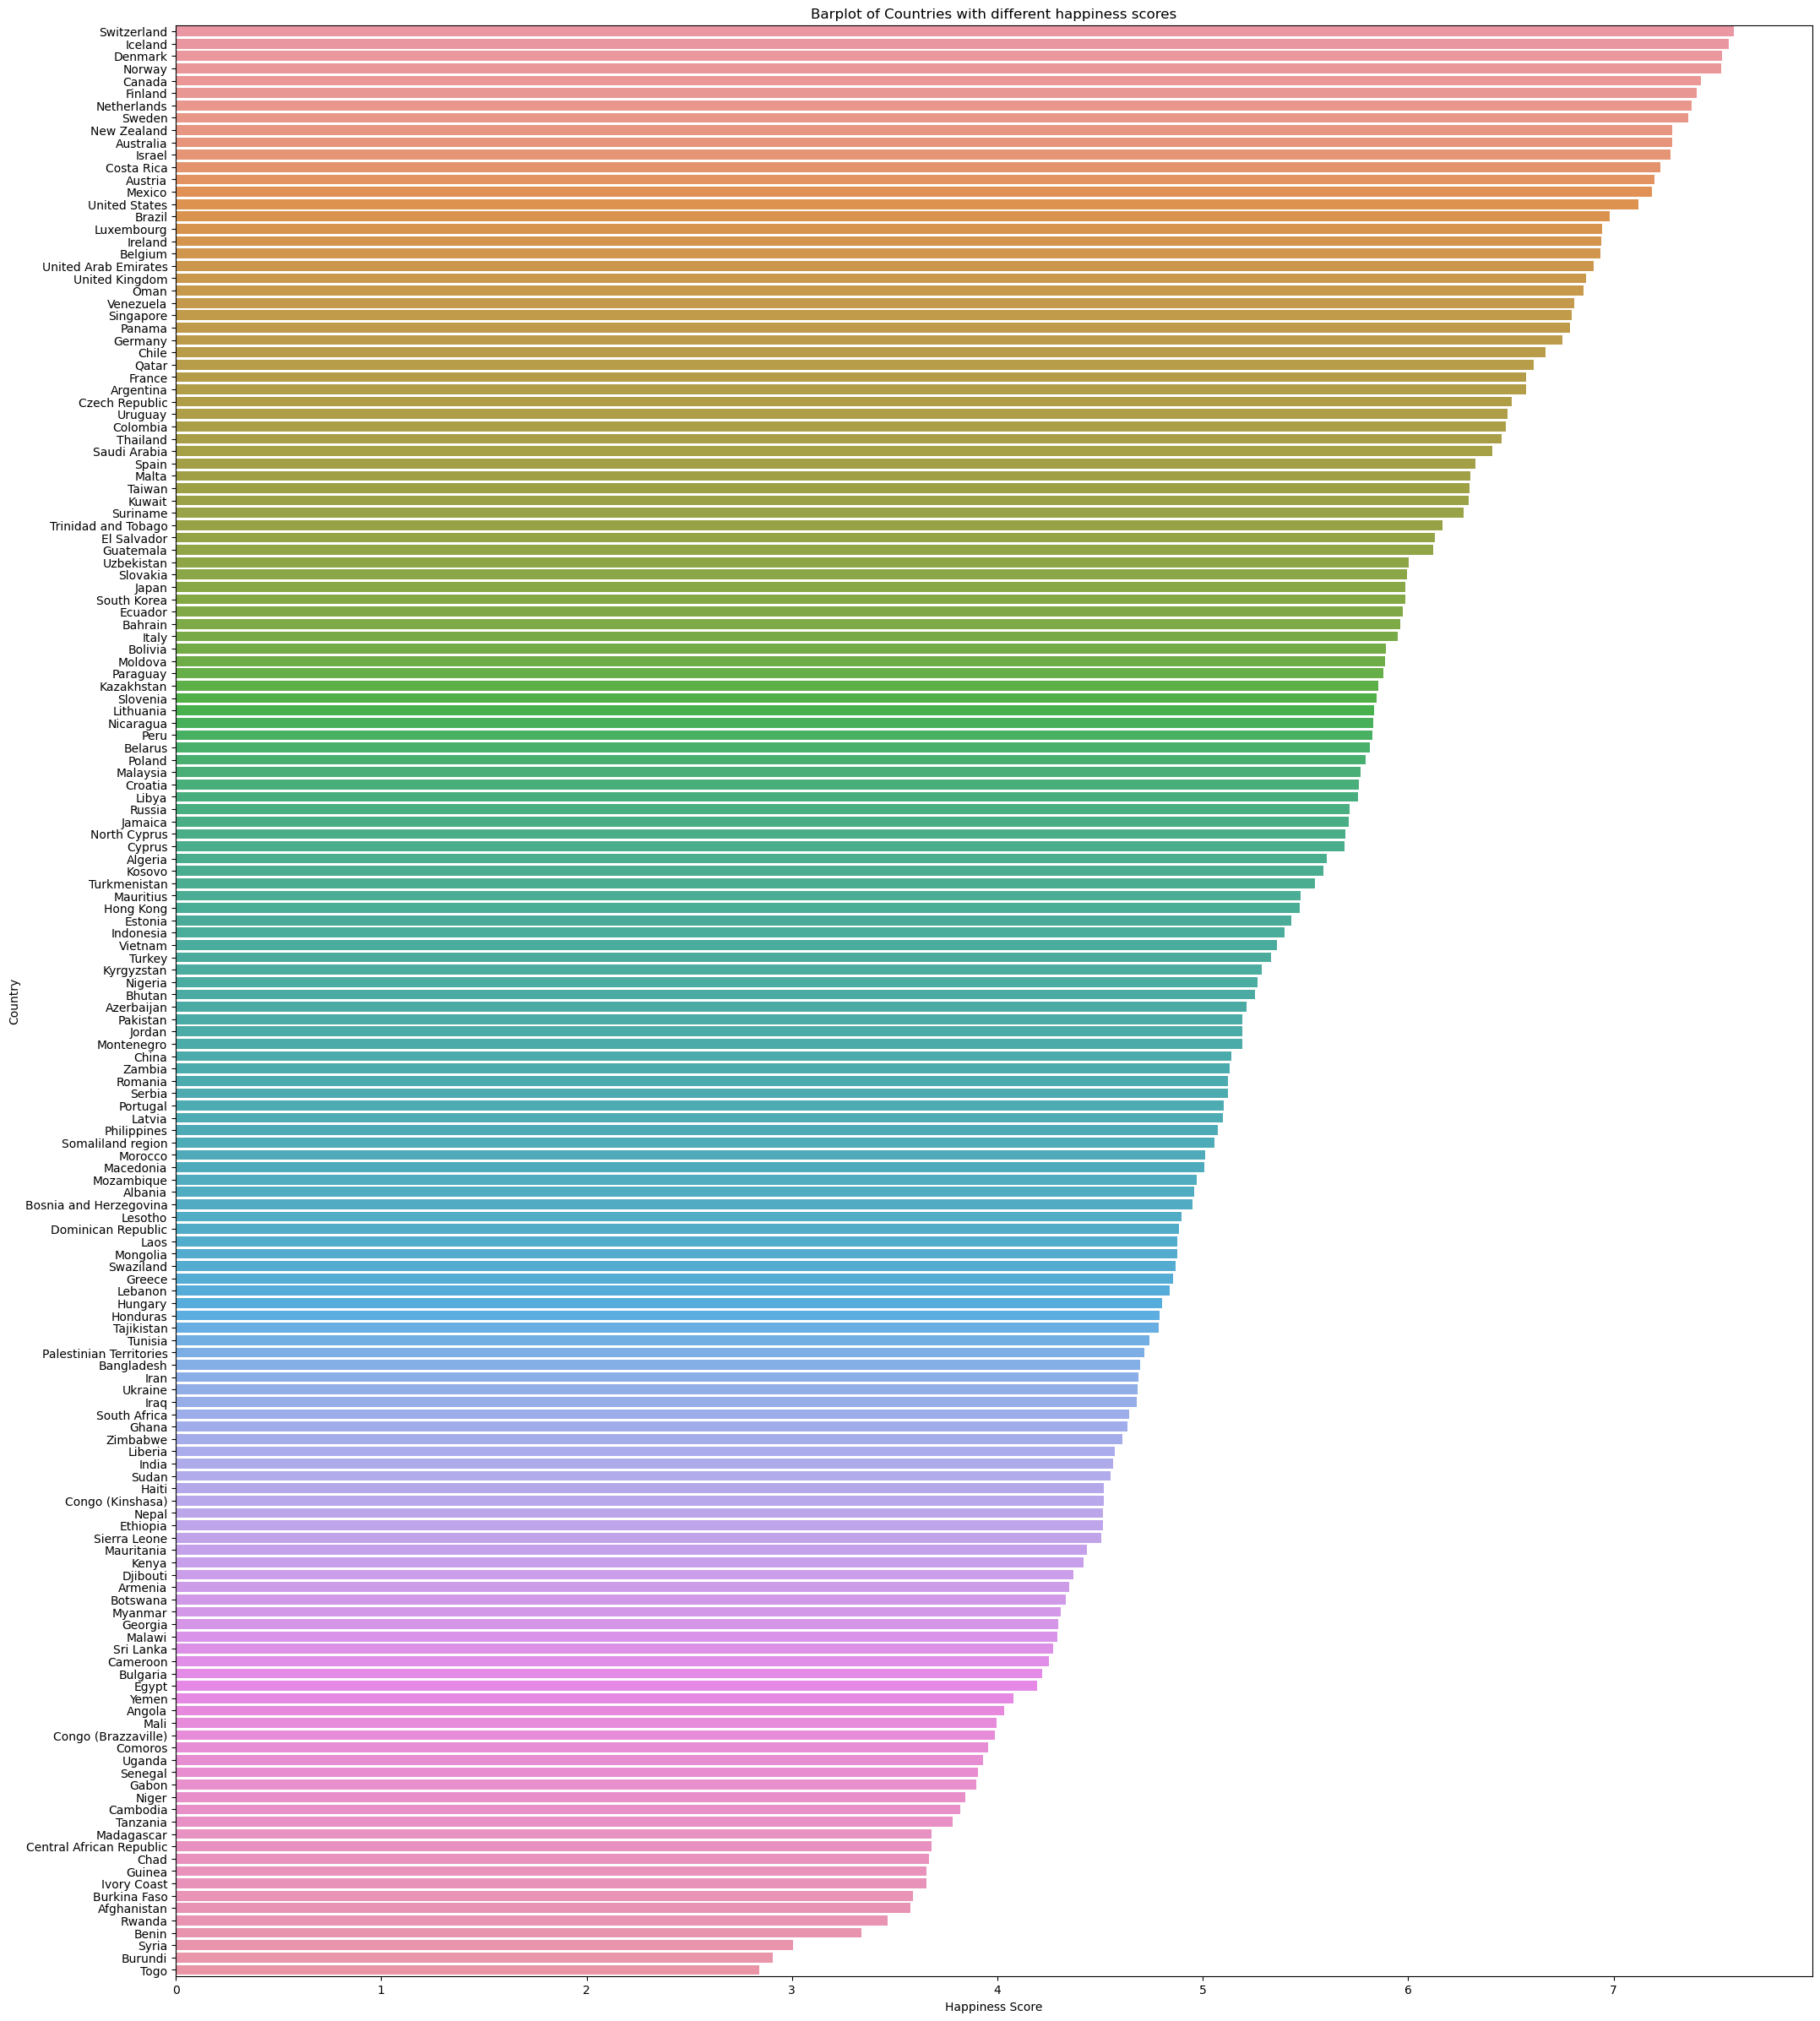

In [21]:
# Applying scatterplot,barplot so that the linear relationship between the target and independent variable becomes evident..
plt.figure(figsize = (25,30))
sns.barplot(x='Happiness Score',y='Country',data=happy)
plt.title("Barplot of Countries with different happiness scores")
plt.show()

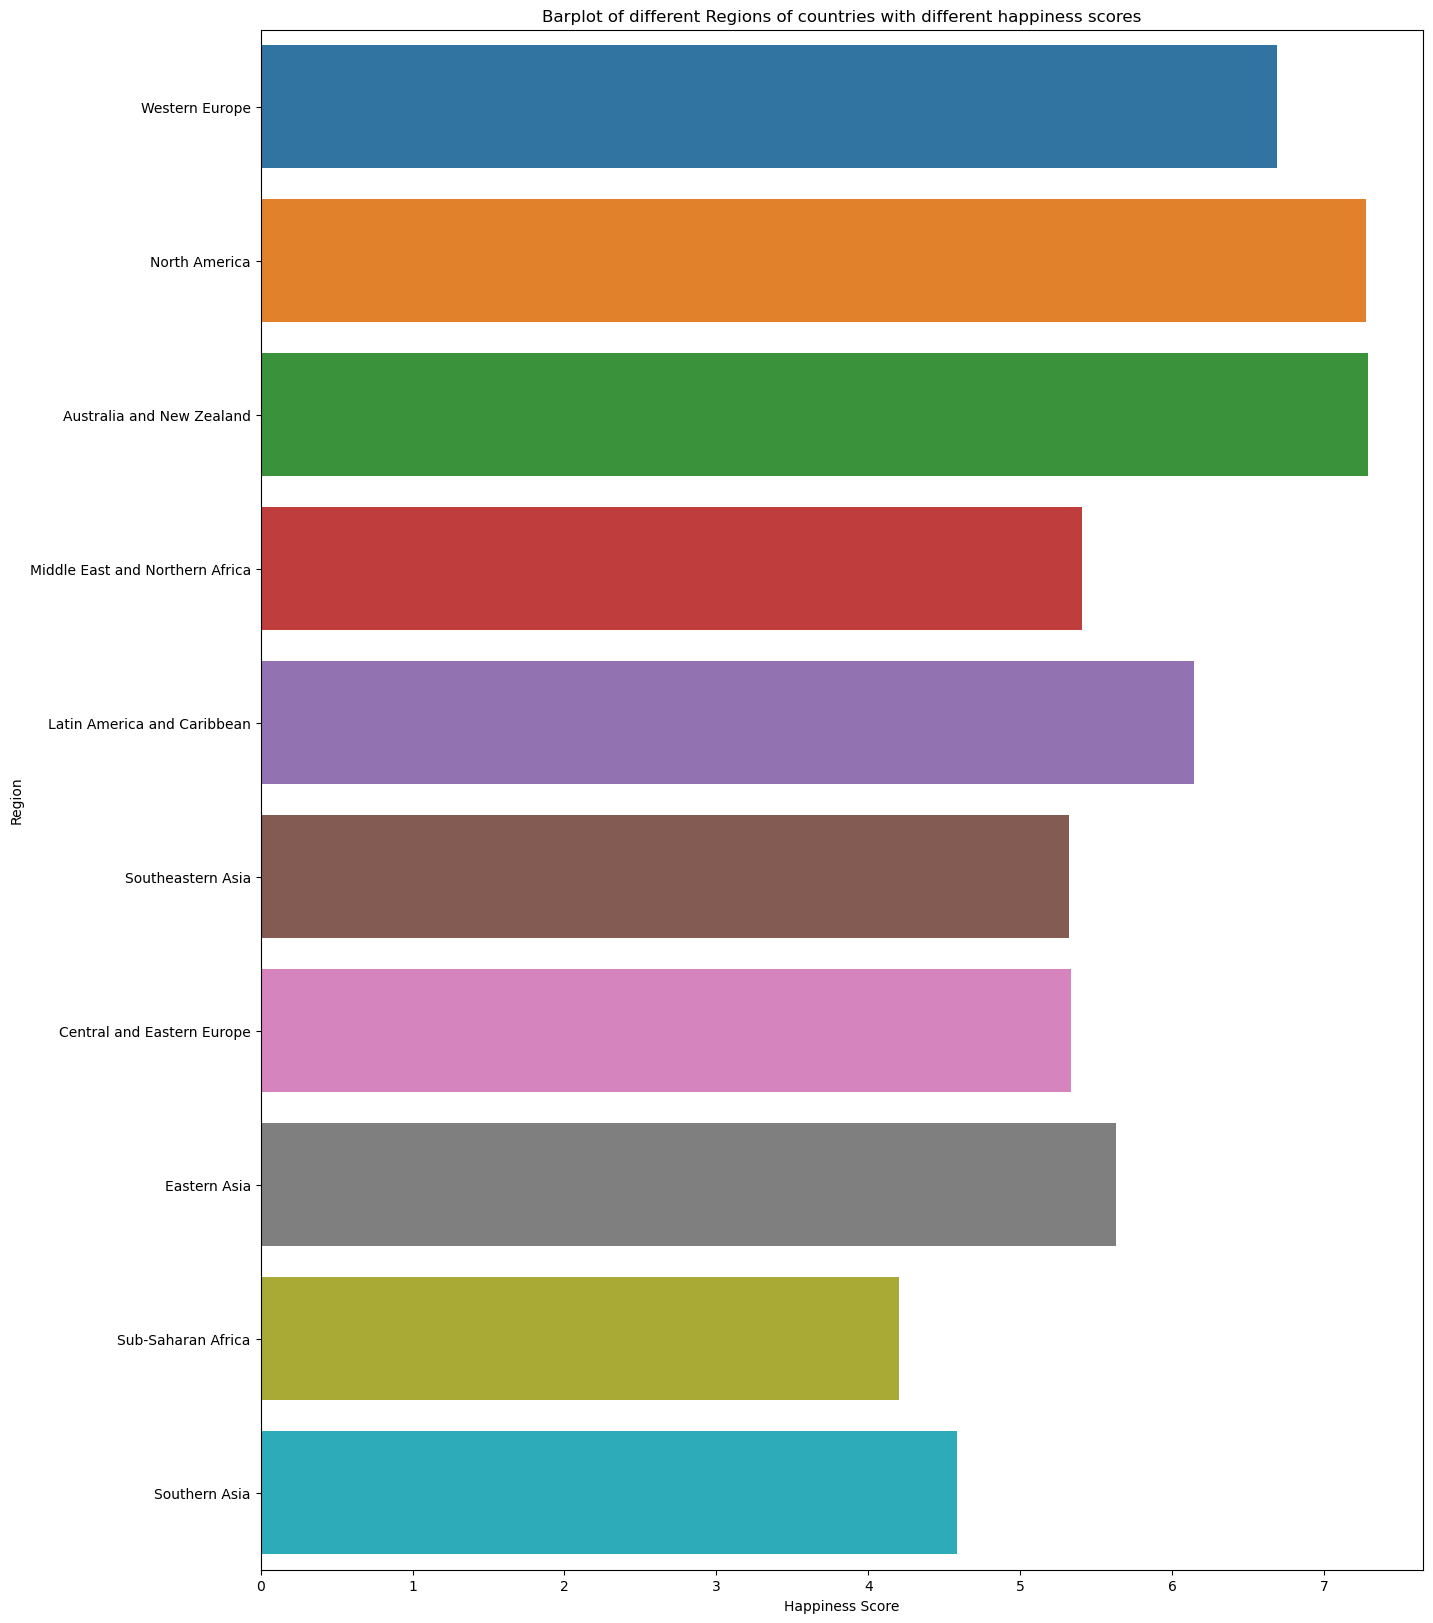

In [23]:
plt.figure(figsize = (15,20))
sns.barplot(x='Happiness Score',y='Region',data=happy,ci = False)
plt.title("Barplot of different Regions of countries with different happiness scores")
plt.show()

The regions 'North America' and 'Australia and New Zealand' have the countries with highest happiness scores, whereas the   'Sub-Saharan Africa' region have the countries with the lowest happiness scores

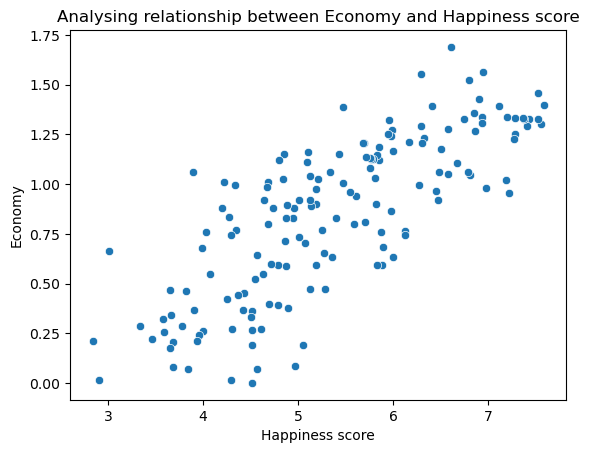

In [24]:
sns.scatterplot(x='Happiness Score',y='Economy (GDP per Capita)',data=happy)
plt.title('Analysing relationship between Economy and Happiness score')
plt.xlabel('Happiness score')
plt.ylabel('Economy')
plt.show()

From the above scatterplot plotted between Economy and Happiness Score, we see that Economy and happiness score are positively
correlated to each other... it means that as Economy of a nation increases, the Happiness score increases too..

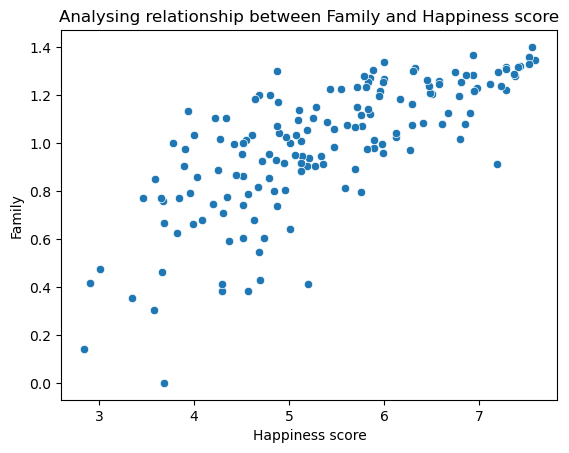

In [25]:
sns.scatterplot(x='Happiness Score',y='Family',data=happy)
plt.title('Analysing relationship between Family and Happiness score')
plt.xlabel('Happiness score')
plt.ylabel('Family')
plt.show()

Again, from the above from the above scatterplot plotted between Family and Happiness Score, we see that Family and happiness score are somewhat positively correlated to each other..

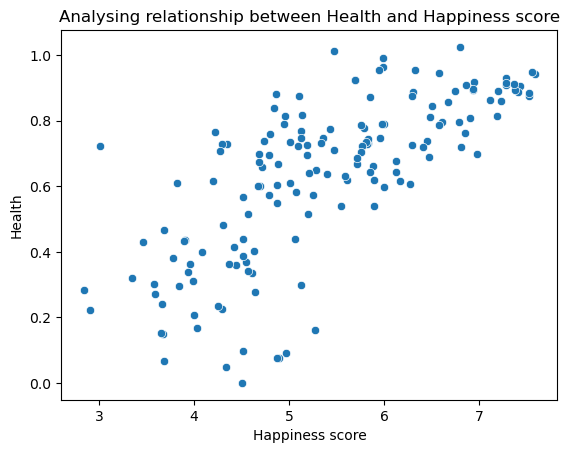

In [26]:
sns.scatterplot(x='Happiness Score',y='Health (Life Expectancy)',data=happy)
plt.title('Analysing relationship between Health and Happiness score')
plt.xlabel('Happiness score')
plt.ylabel('Health')
plt.show()

From the above scatterplot plotted between Health and Happiness Score, we again see that Health and happiness score are positively correlated to each other... it means that as Life Expectancy of a nation is long, the happiness score tends to increase..

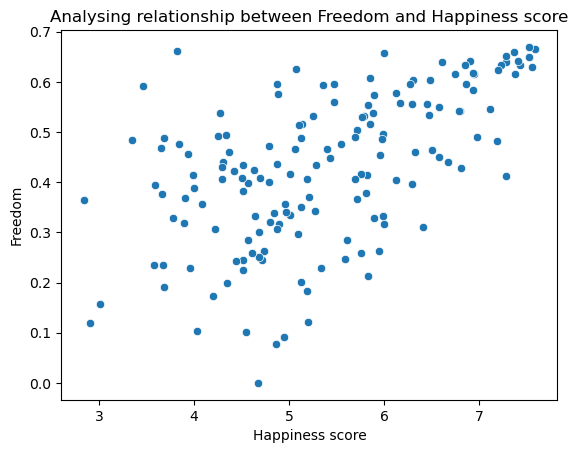

In [27]:
sns.scatterplot(x='Happiness Score',y='Freedom',data=happy)
plt.title('Analysing relationship between Freedom and Happiness score')
plt.xlabel('Happiness score')
plt.ylabel('Freedom')
plt.show()

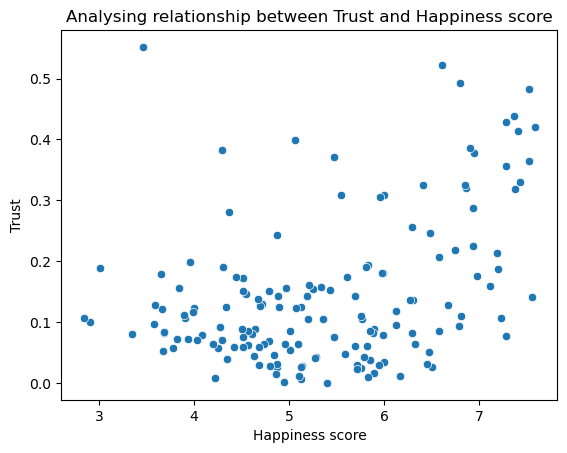

In [28]:
sns.scatterplot(x='Happiness Score',y='Trust (Government Corruption)',data=happy)
plt.title('Analysing relationship between Trust and Happiness score')
plt.xlabel('Happiness score')
plt.ylabel('Trust')
plt.show()

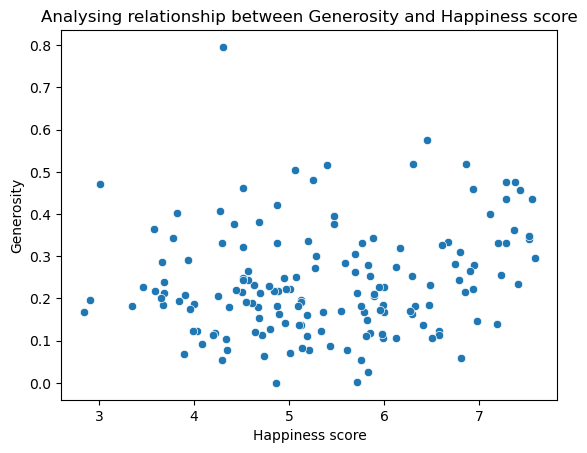

In [29]:
sns.scatterplot(x='Happiness Score',y='Generosity',data=happy)
plt.title('Analysing relationship between Generosity and Happiness score')
plt.xlabel('Happiness score')
plt.ylabel('Generosity')
plt.show()

From the above scatterplots plotted between Freedom,Trust and Generosity with Happiness Score, we again see that Freedom and happiness score are positively correlated to each other...but it is not the case with Trust and Generosity,as both are slightly positively correlated and not strongly like the other features...

## Multivariate Analysis 

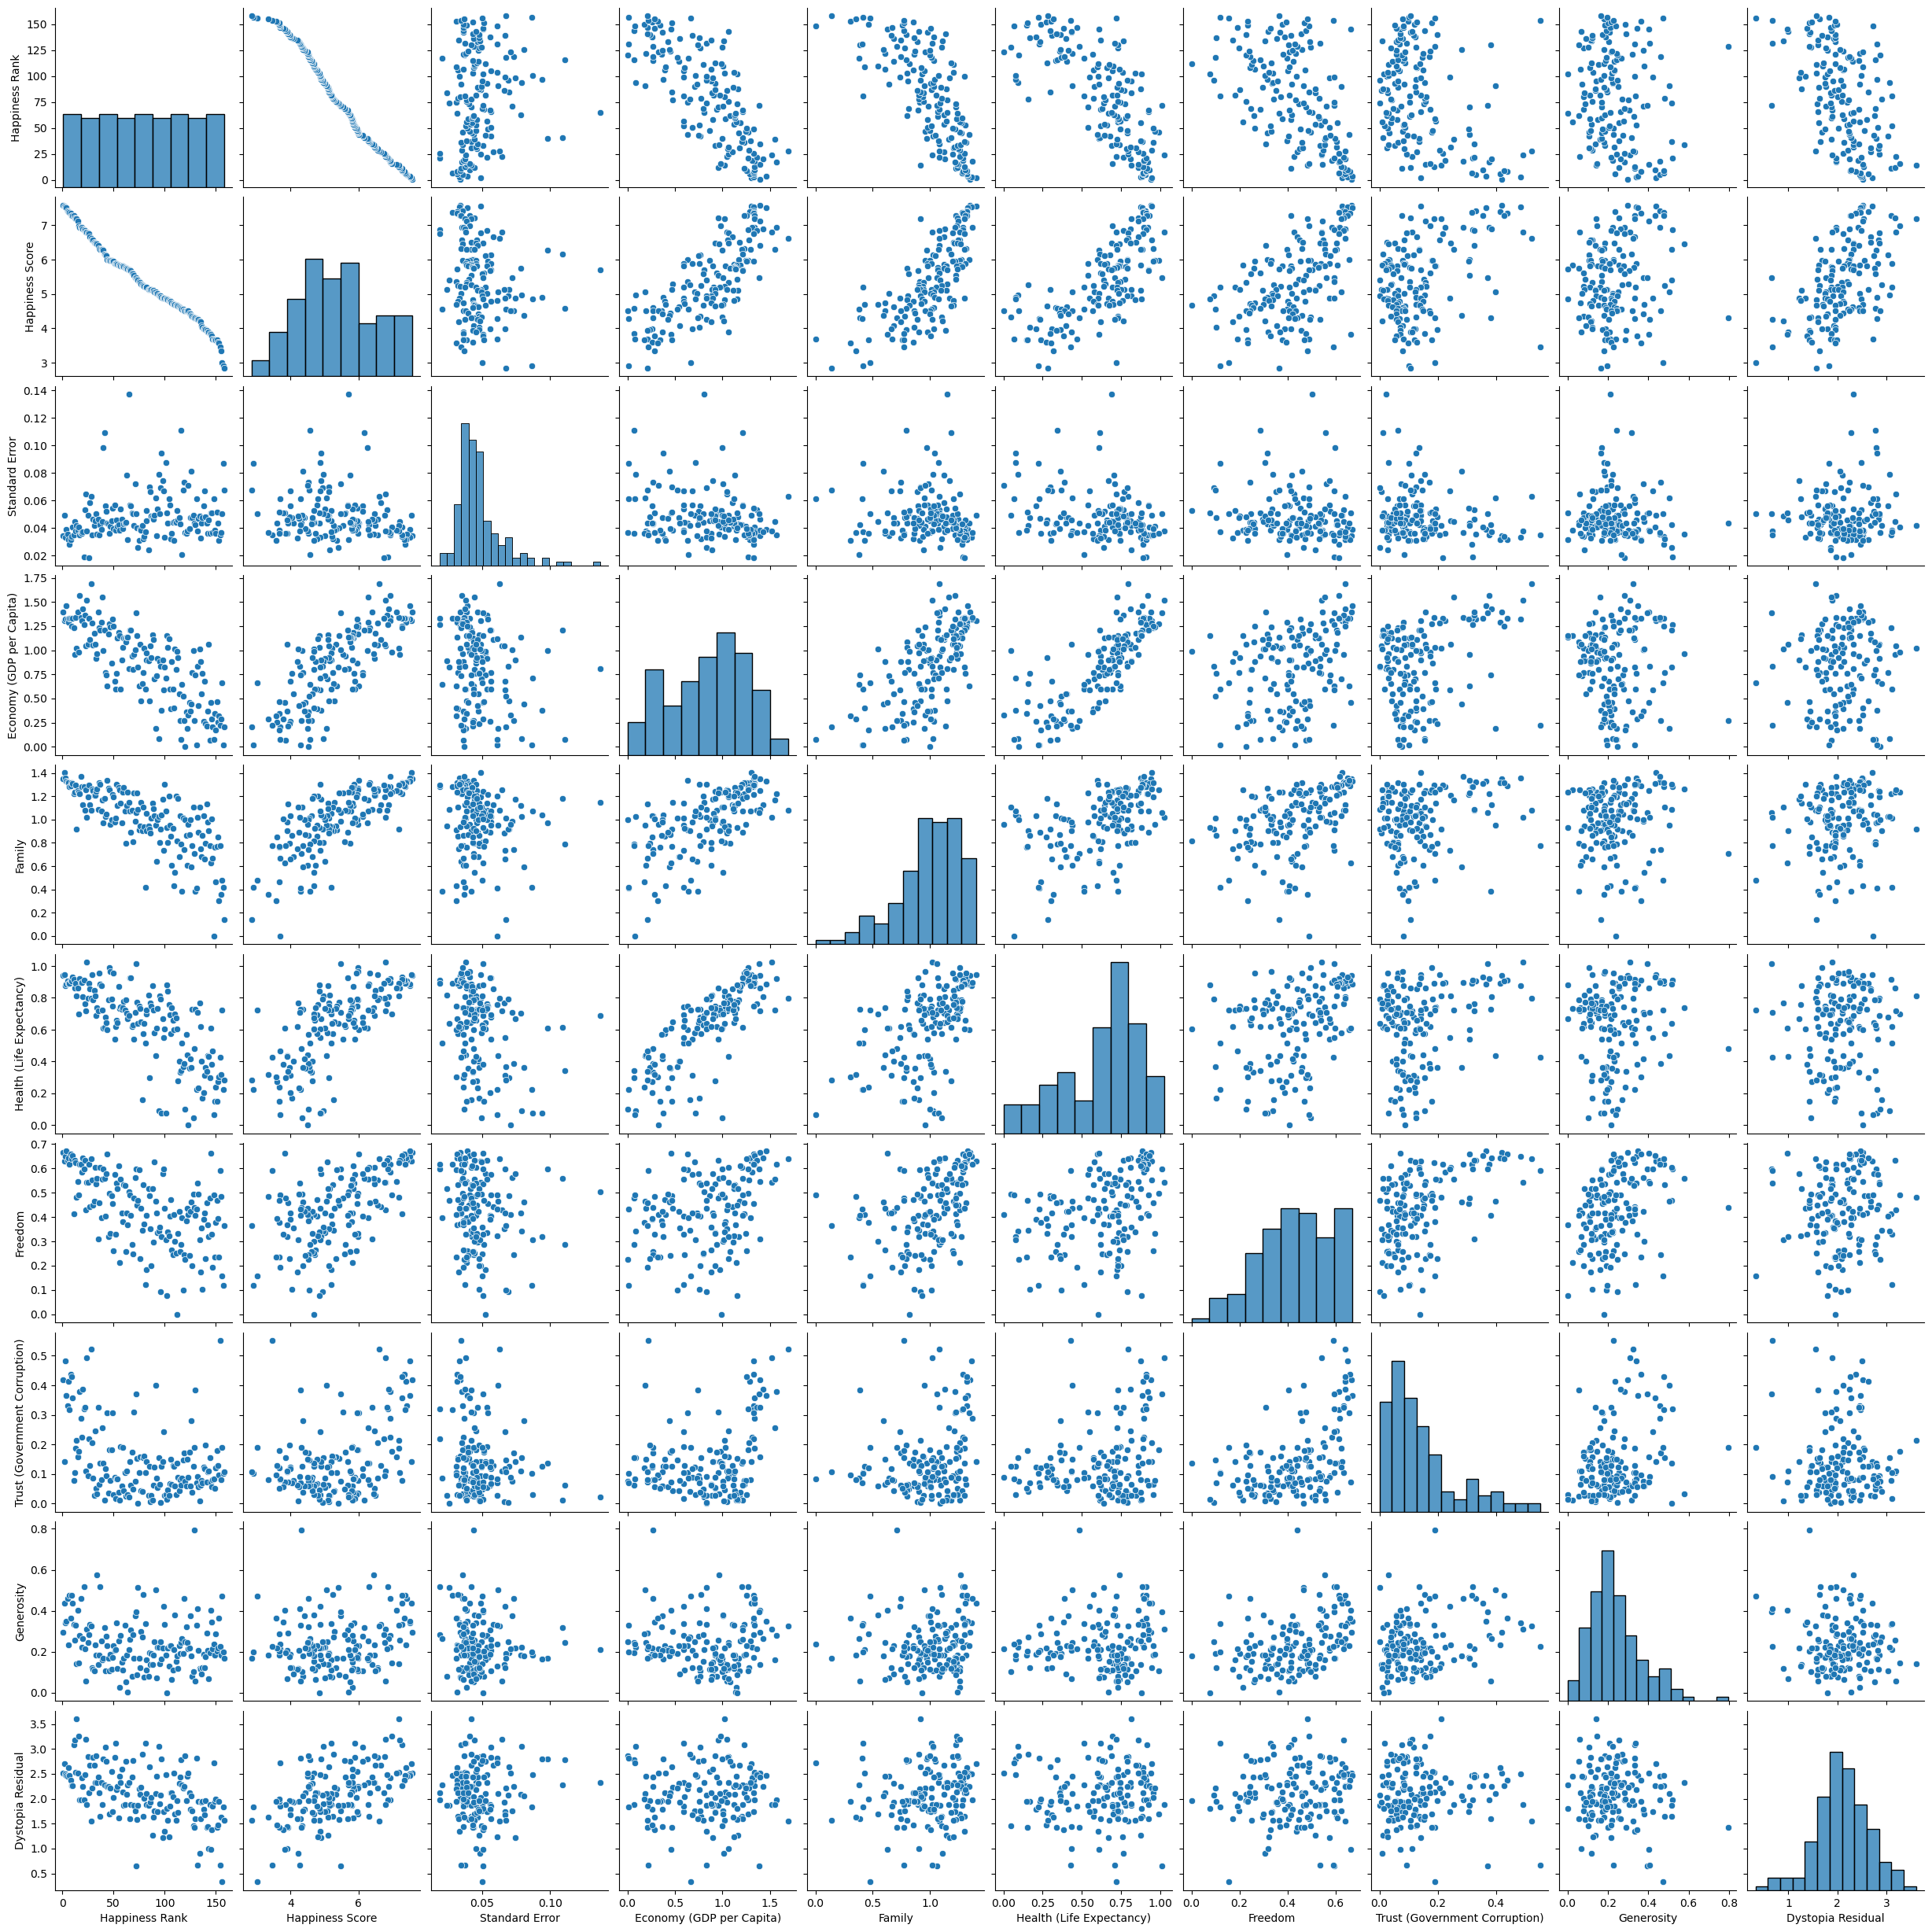

In [30]:
#Plotting the target variable against the independent variables using pairplot,so that the underlying linear relationship becomes more evident..
sns.pairplot(happy)

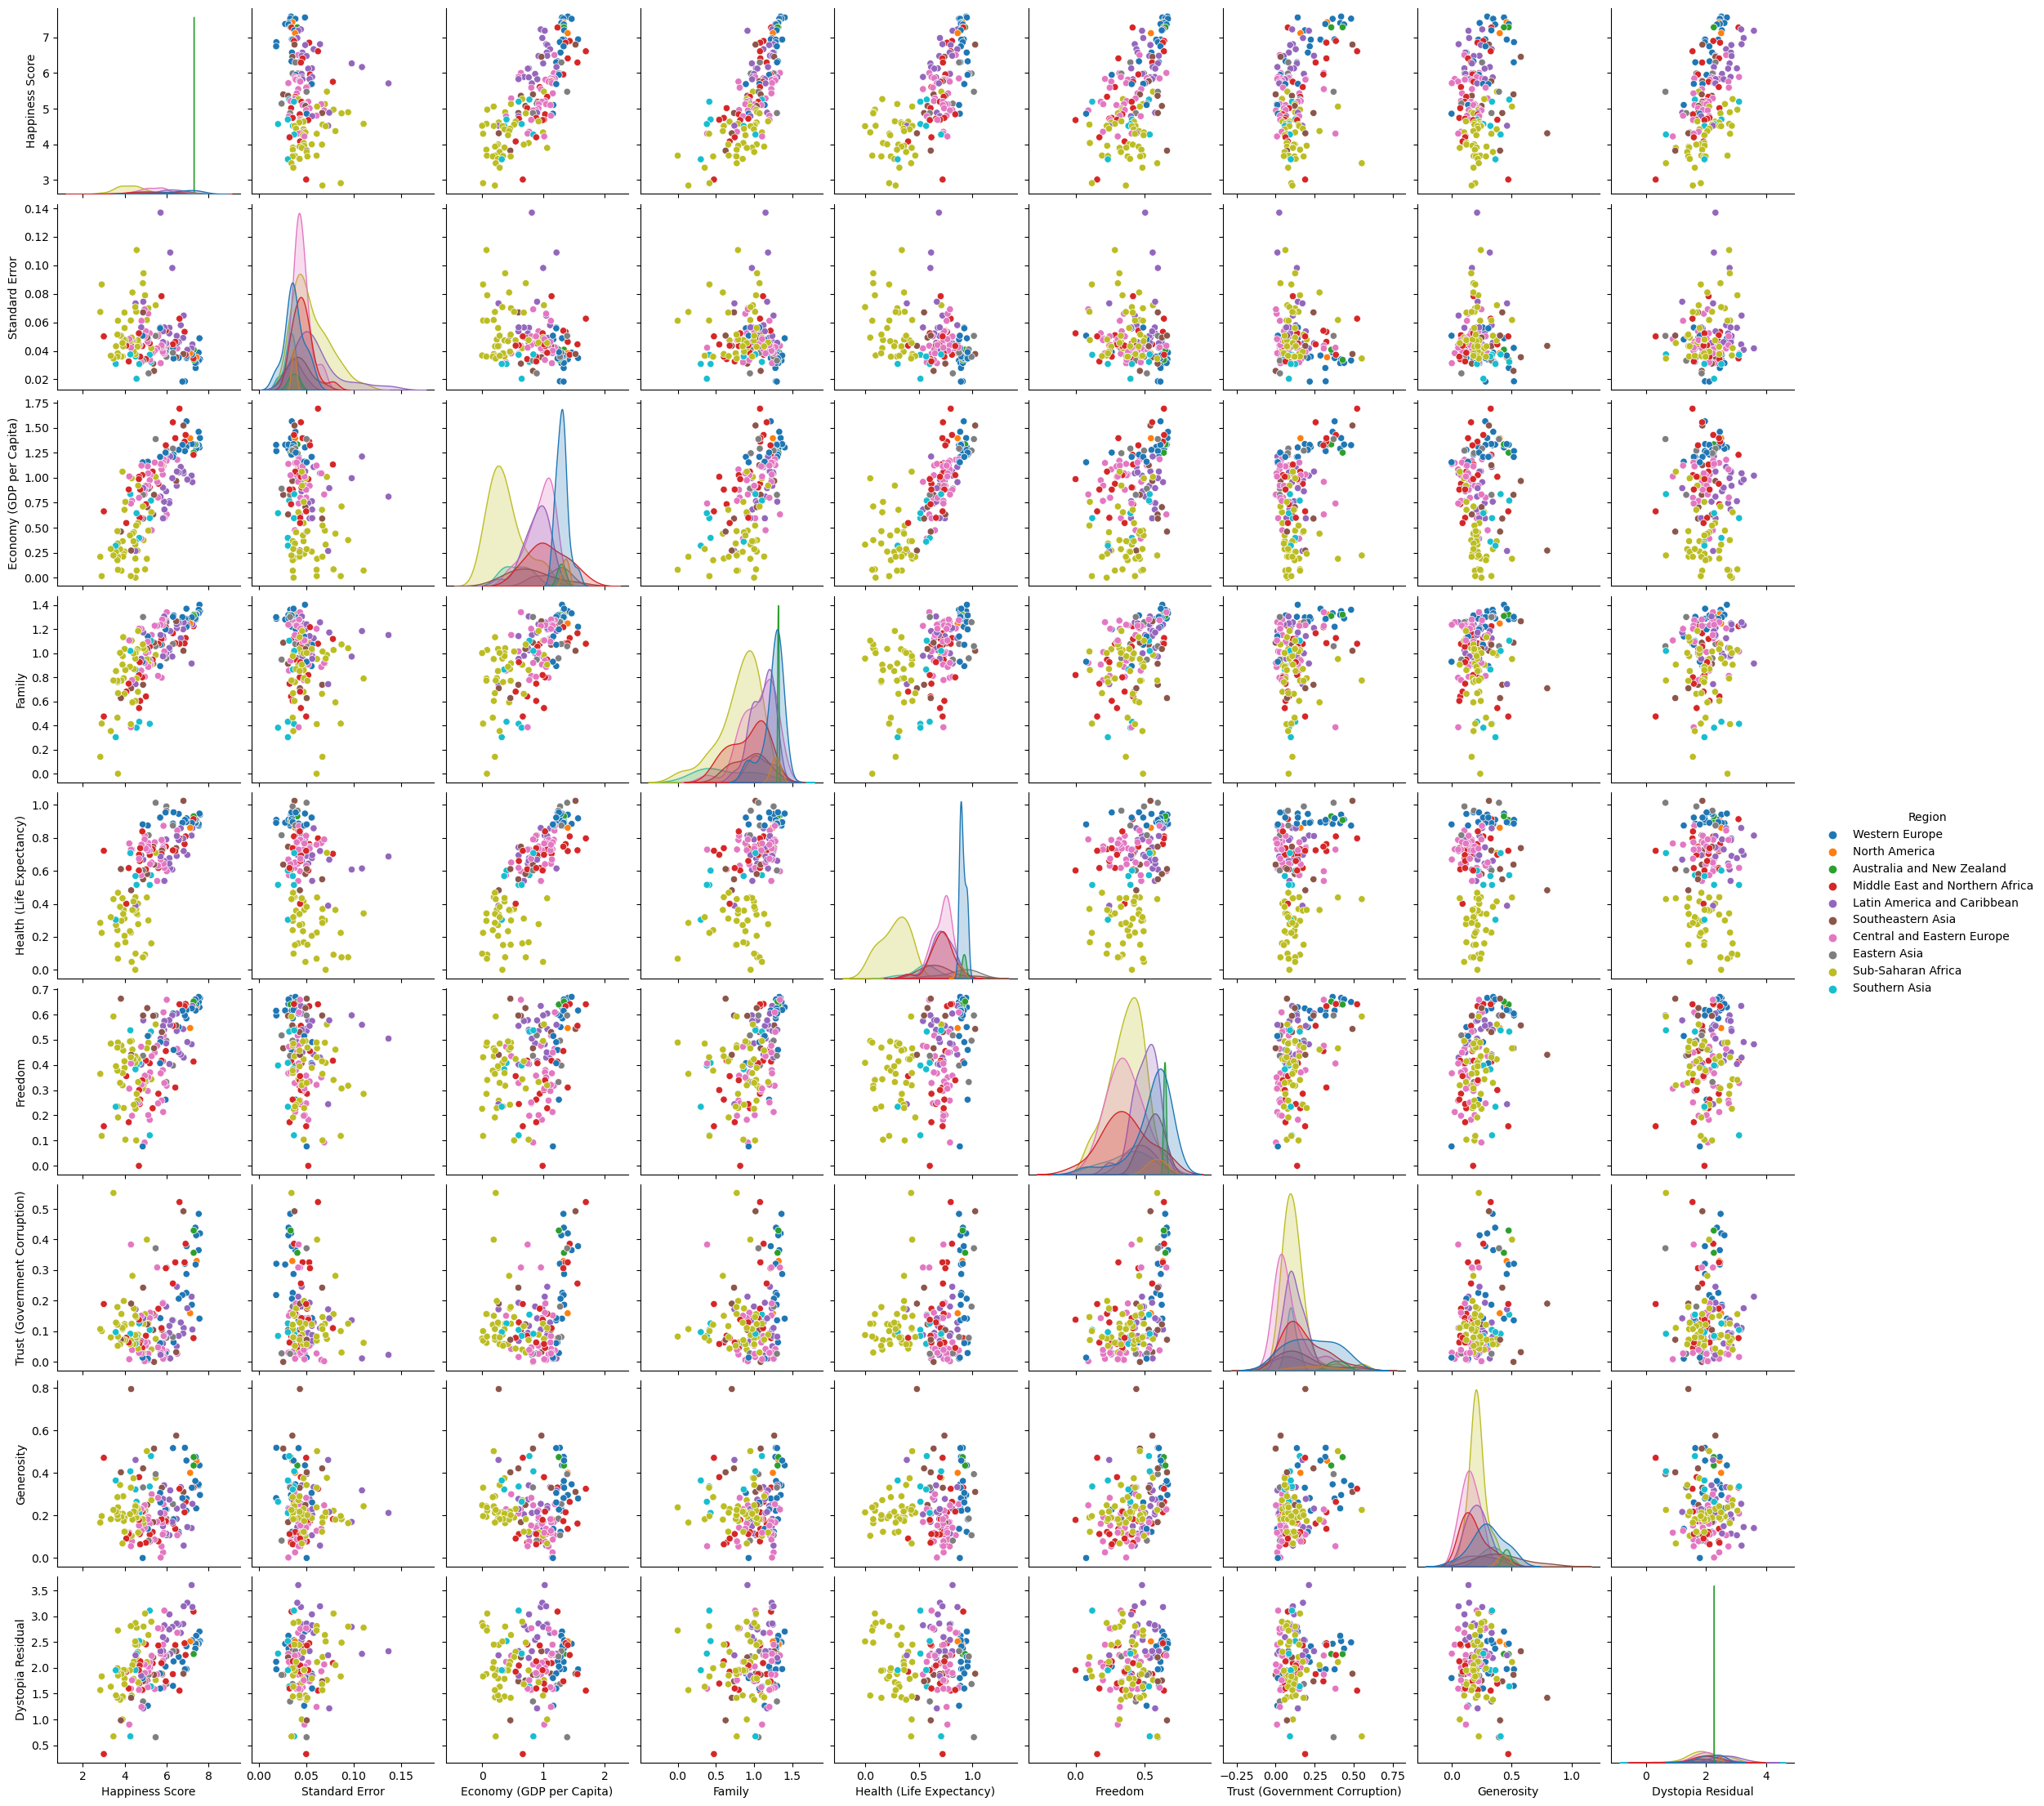

In [12]:
sns.pairplot(happy,hue = 'Region')

In [14]:
happy

Country                           Region  Happiness Score  \
0    Switzerland                   Western Europe            7.587   
1        Iceland                   Western Europe            7.561   
2        Denmark                   Western Europe            7.527   
3         Norway                   Western Europe            7.522   
4         Canada                    North America            7.427   
..           ...                              ...              ...   
153       Rwanda               Sub-Saharan Africa            3.465   
154        Benin               Sub-Saharan Africa            3.340   
155        Syria  Middle East and Northern Africa            3.006   
156      Burundi               Sub-Saharan Africa            2.905   
157         Togo               Sub-Saharan Africa            2.839   

     Standard Error  Economy (GDP per Capita)   Family  \
0           0.03411                   1.39651  1.34951   
1           0.04884                   1.30232  1.40223   
2           0.03328                   1.32548  1.36058   
3           0.03880                   1.45900  1.33095   
4           0.03553                   1.32629  1.32261   
..              ...                       ...      ...   
153         0.03464                   0.22208  0.77370   
154         0.03656                   0.28665  0.35386   
155         0.05015                   0.66320  0.47489   
156         0.08658                   0.01530  0.41587   
157         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 11 columns]

## Feature Engineering and Feature Selection

<Axes: >

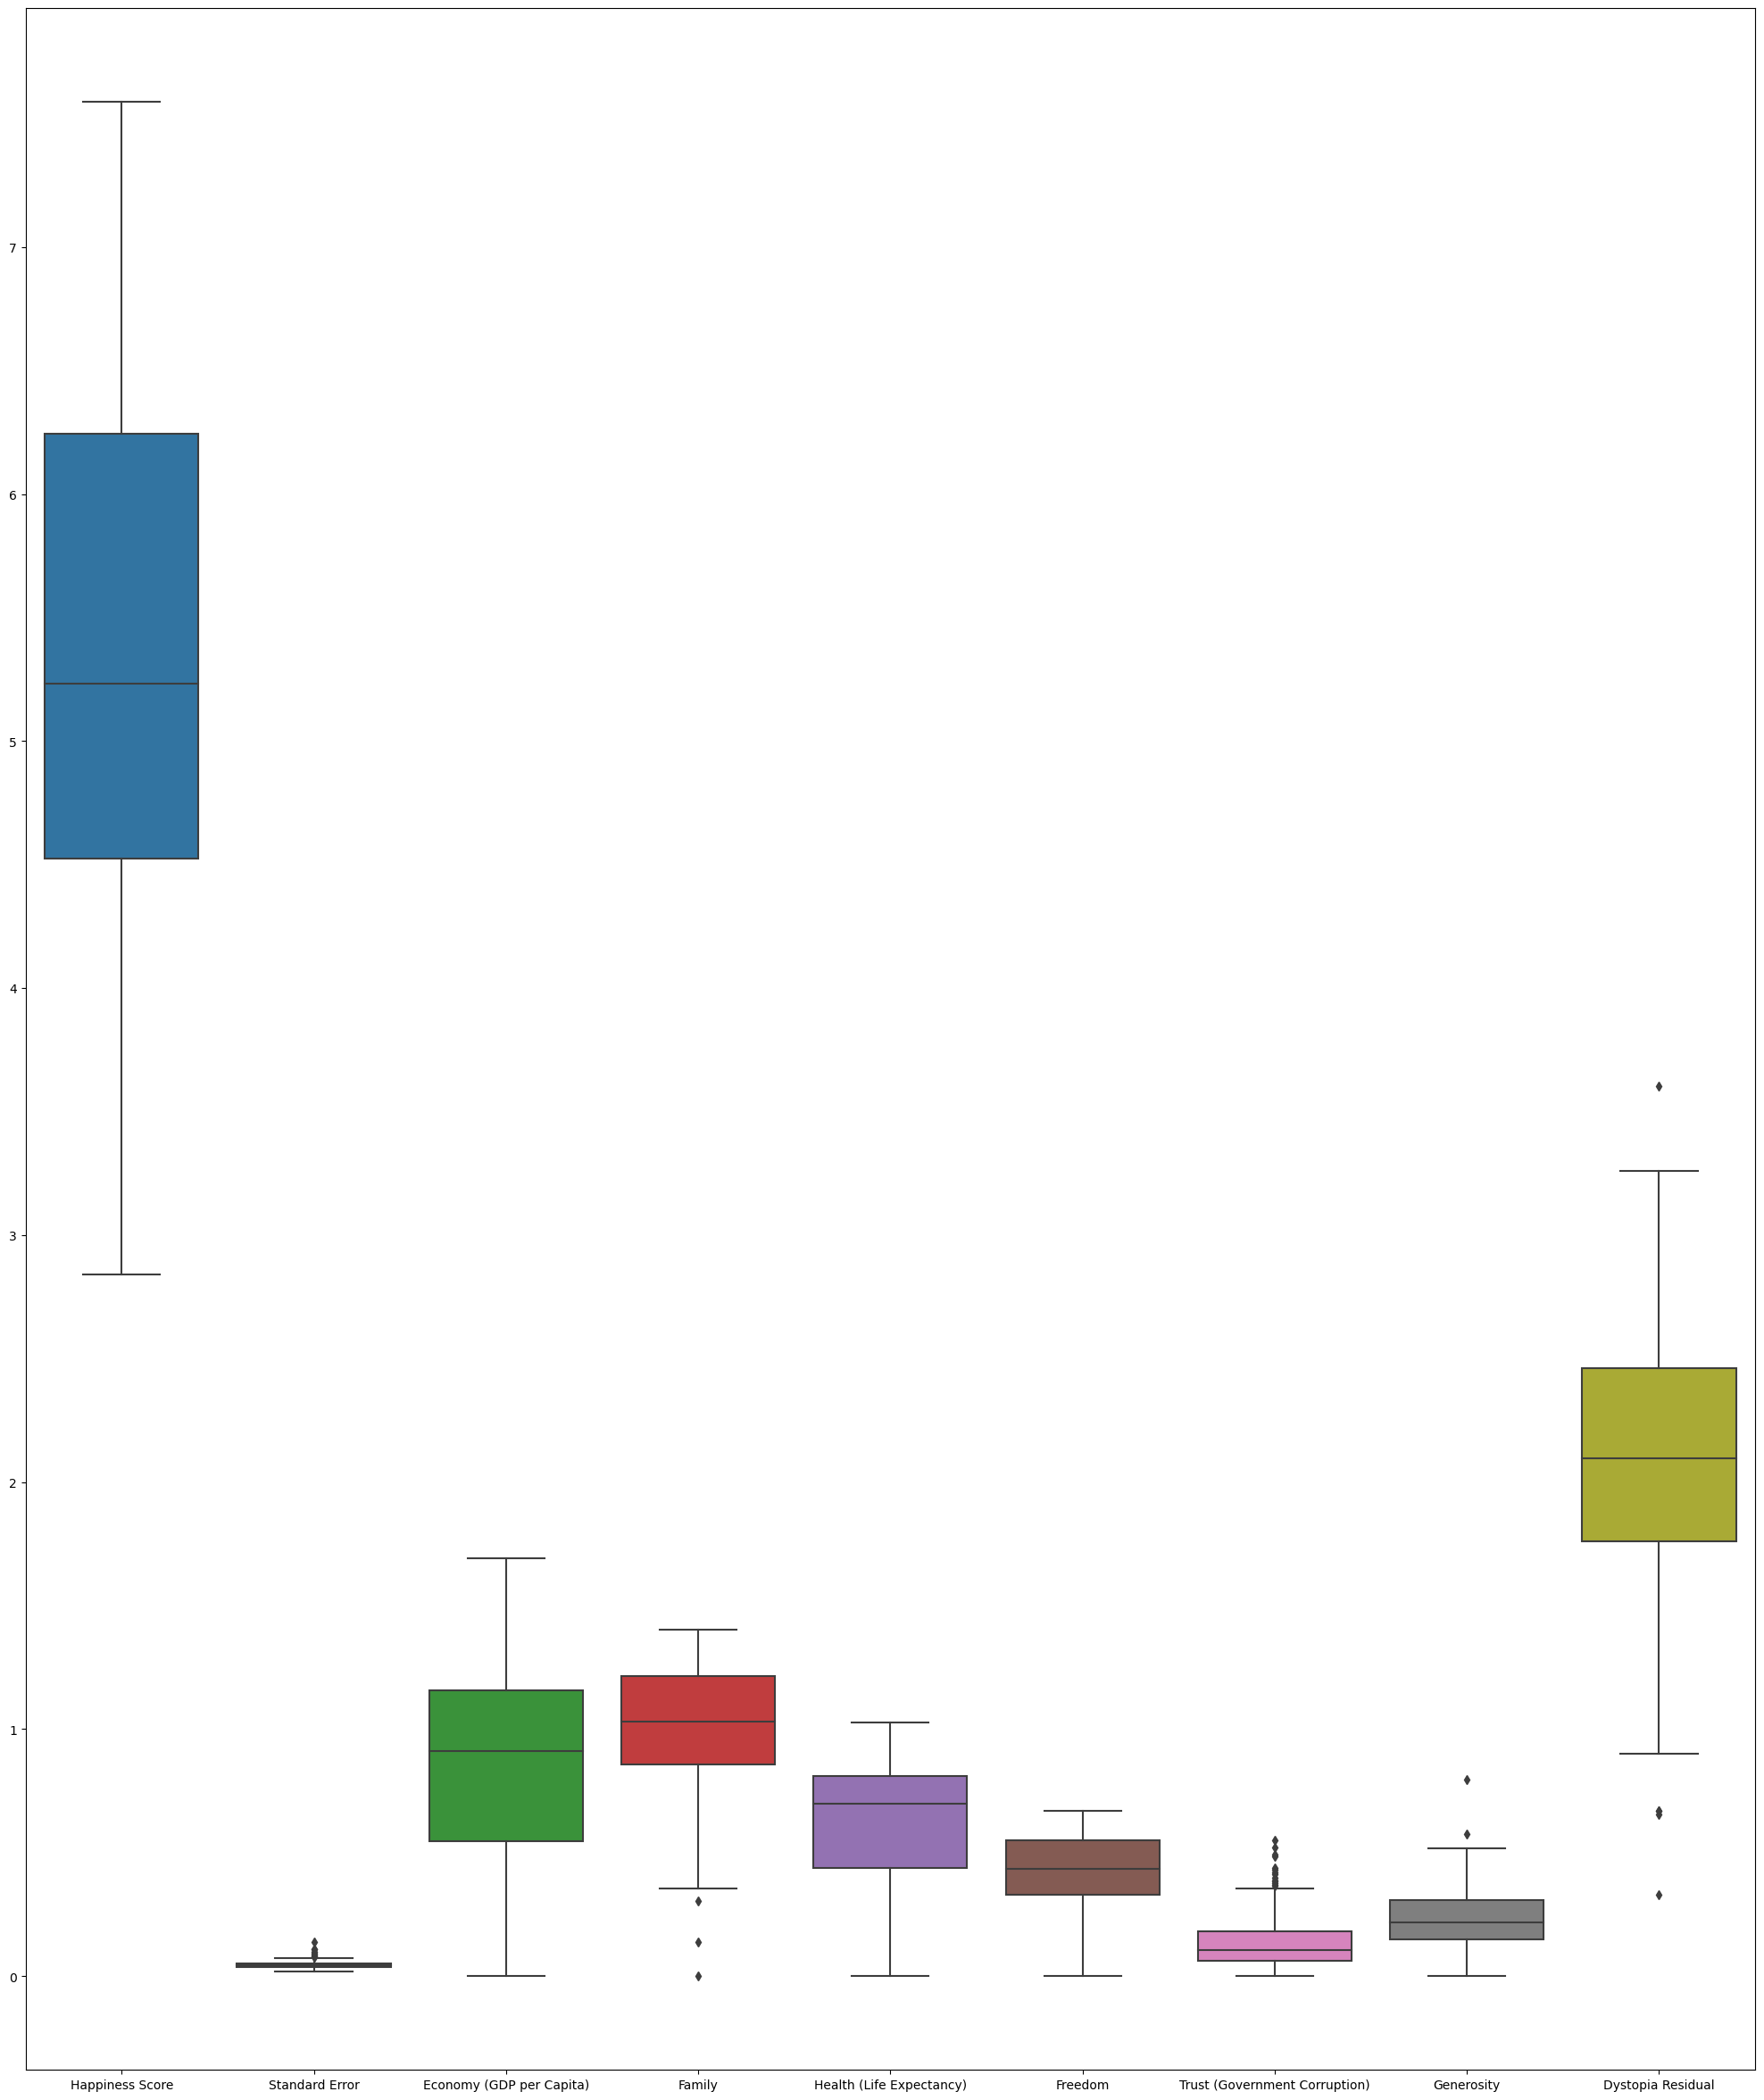

In [16]:
#Now let's detect outliers from the numerical columns and remove them only if needed..
plt.figure(figsize = (25,30))
sns.boxplot(happy)

<Axes: >

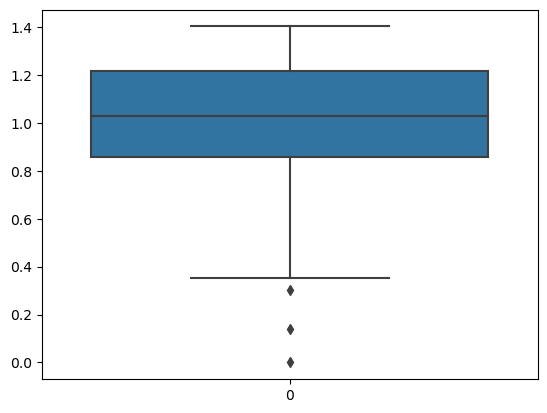

In [17]:
sns.boxplot(happy['Family'])

<Axes: >

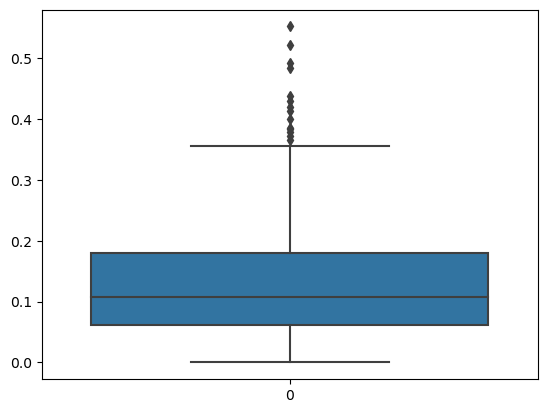

In [18]:
sns.boxplot(happy['Trust (Government Corruption)'])

<Axes: >

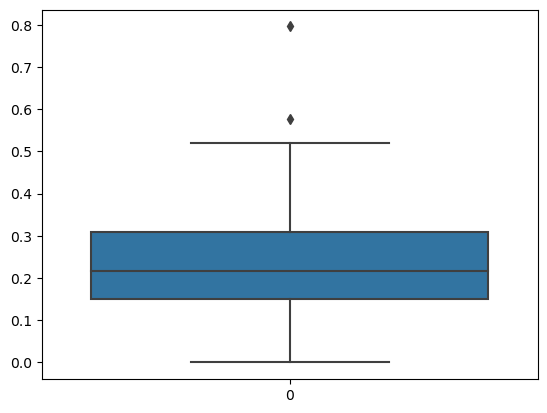

In [19]:
sns.boxplot(happy['Generosity'])

As the number or count of outliers is not so high, we do not want to treat them we shall leave them as it is..as it does not affect our prediction..and also the size of the dataset is not so large too..
Although the 'Trust' column has significantly large number of outliers..we are going to either treat it or drop the column based on the correlation values that we are going to check later..

As we are predicting happiness scores, the columns 'Country' and 'Region' does not make much impact on our prediction..Therefore, we are going to drop these respective columns..

In [34]:
#Droping the respective columns
happy.drop('Country', axis=1, inplace = True)
happy.drop('Region', axis=1, inplace = True)

In [22]:
happy

Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 9 columns]

### Correlation Analysis

In [24]:
happy_cor = happy.corr()
happy_cor

Happiness Score  Standard Error  \
Happiness Score                       1.000000       -0.177254   
Standard Error                       -0.177254        1.000000   
Economy (GDP per Capita)              0.780966       -0.217651   
Family                                0.740605       -0.120728   
Health (Life Expectancy)              0.724200       -0.310287   
Freedom                               0.568211       -0.129773   
Trust (Government Corruption)         0.395199       -0.178325   
Generosity                            0.180319       -0.088439   
Dystopia Residual                     0.530474        0.083981   

                               Economy (GDP per Capita)    Family  \
Happiness Score                                0.780966  0.740605   
Standard Error                                -0.217651 -0.120728   
Economy (GDP per Capita)                       1.000000  0.645299   
Family                                         0.645299  1.000000   
Health (Life Expectancy)                       0.816478  0.531104   
Freedom                                        0.370300  0.441518   
Trust (Government Corruption)                  0.307885  0.205605   
Generosity                                    -0.010465  0.087513   
Dystopia Residual                              0.040059  0.148117   

                               Health (Life Expectancy)   Freedom  \
Happiness Score                                0.724200  0.568211   
Standard Error                                -0.310287 -0.129773   
Economy (GDP per Capita)                       0.816478  0.370300   
Family                                         0.531104  0.441518   
Health (Life Expectancy)                       1.000000  0.360477   
Freedom                                        0.360477  1.000000   
Trust (Government Corruption)                  0.248335  0.493524   
Generosity                                     0.108335  0.373916   
Dystopia Residual                              0.018979  0.062783   

                               Trust (Government Corruption)  Generosity  \
Happiness Score                                     0.395199    0.180319   
Standard Error                                     -0.178325   -0.088439   
Economy (GDP per Capita)                            0.307885   -0.010465   
Family                                              0.205605    0.087513   
Health (Life Expectancy)                            0.248335    0.108335   
Freedom                                             0.493524    0.373916   
Trust (Government Corruption)                       1.000000    0.276123   
Generosity                                          0.276123    1.000000   
Dystopia Residual                                  -0.033105   -0.101301   

                               Dystopia Residual  
Happiness Score                         0.530474  
Standard Error                          0.083981  
Economy (GDP per Capita)                0.040059  
Family                                  0.148117  
Health (Life Expectancy)                0.018979  
Freedom                                 0.062783  
Trust (Government Corruption)          -0.033105  
Generosity                             -0.101301  
Dystopia Residual                       1.000000

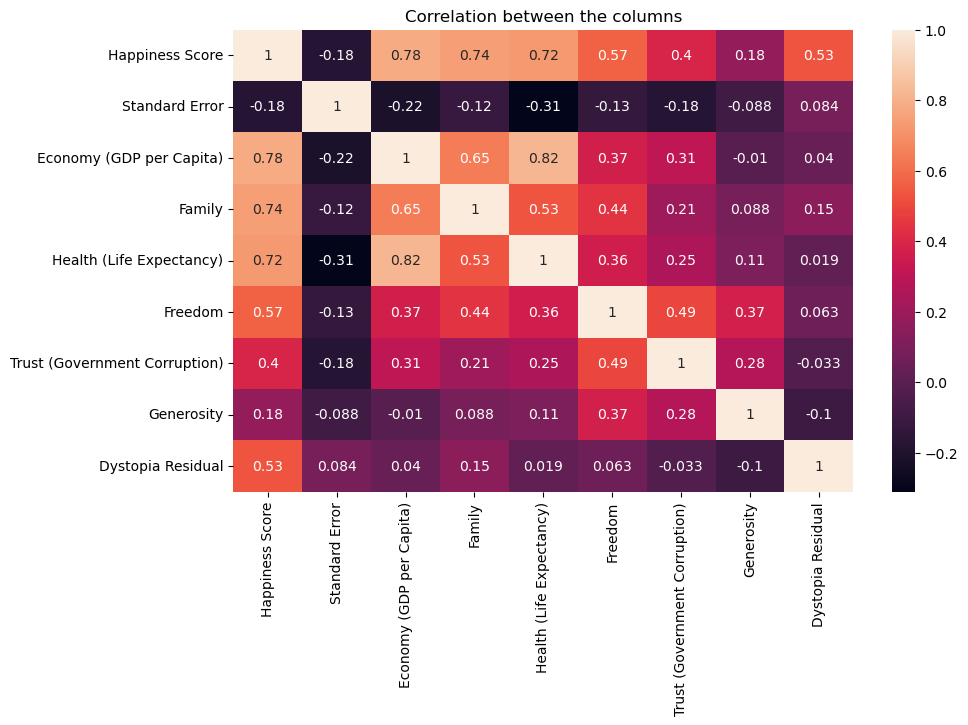

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(happy_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

As we can see from the correlation heatmap, the feature 'Standard Error' is negatively correlated with almost every feature..
and therefore we drop that particular feature and check for correlation..

In [35]:
#Droping the column 
happy.drop('Standard Error', axis=1, inplace = True)

In [27]:
happy

Happiness Score  Economy (GDP per Capita)   Family  \
0              7.587                   1.39651  1.34951   
1              7.561                   1.30232  1.40223   
2              7.527                   1.32548  1.36058   
3              7.522                   1.45900  1.33095   
4              7.427                   1.32629  1.32261   
..               ...                       ...      ...   
153            3.465                   0.22208  0.77370   
154            3.340                   0.28665  0.35386   
155            3.006                   0.66320  0.47489   
156            2.905                   0.01530  0.41587   
157            2.839                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 8 columns]

In [28]:
happy.corr()

Happiness Score  Economy (GDP per Capita)  \
Happiness Score                       1.000000                  0.780966   
Economy (GDP per Capita)              0.780966                  1.000000   
Family                                0.740605                  0.645299   
Health (Life Expectancy)              0.724200                  0.816478   
Freedom                               0.568211                  0.370300   
Trust (Government Corruption)         0.395199                  0.307885   
Generosity                            0.180319                 -0.010465   
Dystopia Residual                     0.530474                  0.040059   

                                 Family  Health (Life Expectancy)   Freedom  \
Happiness Score                0.740605                  0.724200  0.568211   
Economy (GDP per Capita)       0.645299                  0.816478  0.370300   
Family                         1.000000                  0.531104  0.441518   
Health (Life Expectancy)       0.531104                  1.000000  0.360477   
Freedom                        0.441518                  0.360477  1.000000   
Trust (Government Corruption)  0.205605                  0.248335  0.493524   
Generosity                     0.087513                  0.108335  0.373916   
Dystopia Residual              0.148117                  0.018979  0.062783   

                               Trust (Government Corruption)  Generosity  \
Happiness Score                                     0.395199    0.180319   
Economy (GDP per Capita)                            0.307885   -0.010465   
Family                                              0.205605    0.087513   
Health (Life Expectancy)                            0.248335    0.108335   
Freedom                                             0.493524    0.373916   
Trust (Government Corruption)                       1.000000    0.276123   
Generosity                                          0.276123    1.000000   
Dystopia Residual                                  -0.033105   -0.101301   

                               Dystopia Residual  
Happiness Score                         0.530474  
Economy (GDP per Capita)                0.040059  
Family                                  0.148117  
Health (Life Expectancy)                0.018979  
Freedom                                 0.062783  
Trust (Government Corruption)          -0.033105  
Generosity                             -0.101301  
Dystopia Residual                       1.000000

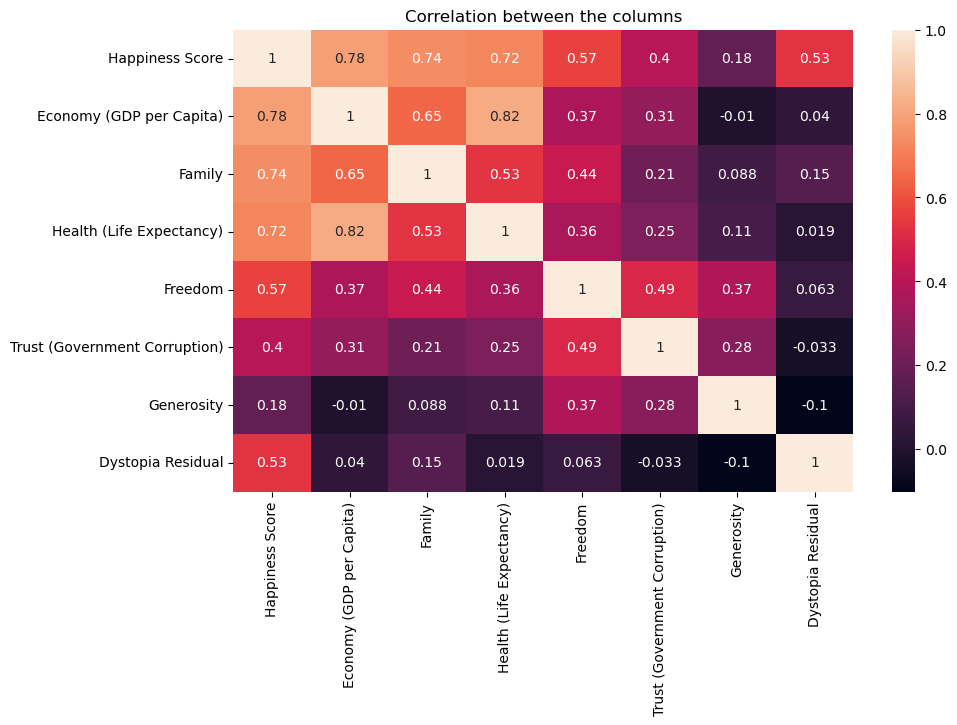

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(happy.corr(), annot = True)
plt.title("Correlation between the columns")
plt.show()

Now, we see that the relationship between the target and the features are all almost positively correlated...which is a really good sign...
As we said earlier that we remove the 'Trust' column if it is negatively correlated...turns out it is not..no need to drop that
particular column..now we can move onto model training...

## Data Preprocessing 

In [36]:
happy

Happiness Score  Economy (GDP per Capita)   Family  \
0              7.587                   1.39651  1.34951   
1              7.561                   1.30232  1.40223   
2              7.527                   1.32548  1.36058   
3              7.522                   1.45900  1.33095   
4              7.427                   1.32629  1.32261   
..               ...                       ...      ...   
153            3.465                   0.22208  0.77370   
154            3.340                   0.28665  0.35386   
155            3.006                   0.66320  0.47489   
156            2.905                   0.01530  0.41587   
157            2.839                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 8 columns]

In [37]:
y = happy['Happiness Score']

In [40]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [47]:
x = happy
x

Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                     1.30232  1.40223                   0.94784  0.62877   
2                     1.32548  1.36058                   0.87464  0.64938   
3                     1.45900  1.33095                   0.88521  0.66973   
4                     1.32629  1.32261                   0.90563  0.63297   
..                        ...      ...                       ...      ...   
153                   0.22208  0.77370                   0.42864  0.59201   
154                   0.28665  0.35386                   0.31910  0.48450   
155                   0.66320  0.47489                   0.72193  0.15684   
156                   0.01530  0.41587                   0.22396  0.11850   
157                   0.20868  0.13995                   0.28443  0.36453   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
0                          0.41978     0.29678            2.51738  
1                          0.14145     0.43630            2.70201  
2                          0.48357     0.34139            2.49204  
3                          0.36503     0.34699            2.46531  
4                          0.32957     0.45811            2.45176  
..                             ...         ...                ...  
153                        0.55191     0.22628            0.67042  
154                        0.08010     0.18260            1.63328  
155                        0.18906     0.47179            0.32858  
156                        0.10062     0.19727            1.83302  
157                        0.10731     0.16681            1.56726  

[158 rows x 7 columns]

In [51]:
#Scaling the features
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = pd.DataFrame(ms.fit_transform(x))

In [52]:
X

0         1         2         3         4         5         6
0    0.826132  0.962403  0.918244  0.993789  0.760595  0.372895  0.668630
1    0.770412  1.000000  0.924496  0.938841  0.256292  0.548198  0.725030
2    0.784113  0.970297  0.853099  0.969615  0.876175  0.428947  0.660889
3    0.863099  0.949167  0.863409  1.000000  0.661394  0.435983  0.652724
4    0.784592  0.943219  0.883326  0.945112  0.597144  0.575602  0.648584
..        ...       ...       ...       ...       ...       ...       ...
153  0.131376  0.551764  0.418083  0.883953  1.000000  0.284314  0.104425
154  0.169573  0.252355  0.311241  0.723426  0.145132  0.229432  0.398557
155  0.392329  0.338668  0.704150  0.234184  0.342556  0.592790  0.000000
156  0.009051  0.296578  0.218444  0.176937  0.182312  0.247864  0.459573
157  0.123449  0.099805  0.277425  0.544294  0.194434  0.209592  0.378389

[158 rows x 7 columns]

In [53]:
# Now, Splitting the data into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [54]:
print("X_train ",X_train.shape)
print("y_train ",y_train.shape)
print("X_test ",X_test.shape)
print("y_test ",y_test.shape)

X_train  (110, 7)
y_train  (110,)
X_test  (48, 7)
y_test  (48,)


## Model Training 

#### Linear Regression 

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [56]:
LR = LinearRegression()
LR.fit(X_train,y_train)
LR_pred = LR.predict(X_test)
pred_train = LR.predict(X_train)
print('R2_score:',r2_score(y_test,LR_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,LR_pred))
print('Mean Squared Error:',mean_squared_error(y_test,LR_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,LR_pred)))

R2_score: 0.9999999285520532
Mean Absolute Error: 0.0002538044033058943
Mean Squared Error: 8.94676745779036e-08
Root Mean Squared Error: 0.00029911147516921443


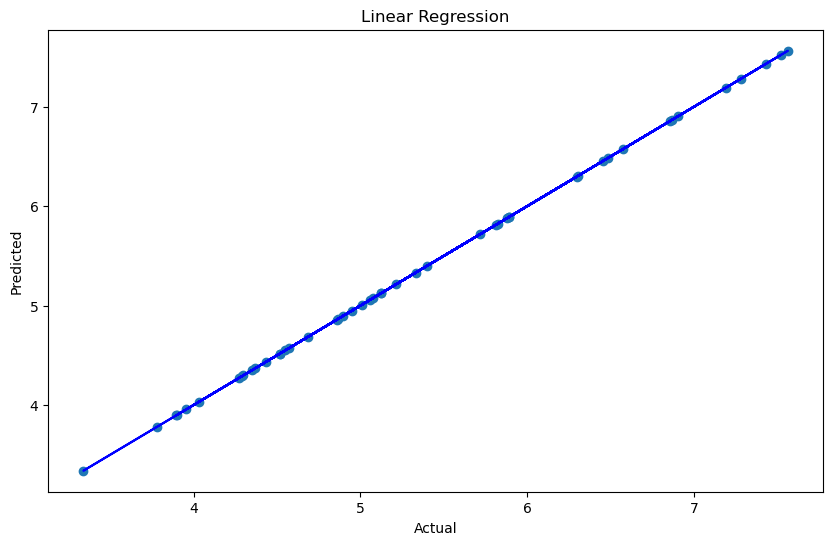

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(x=LR_pred,y=y_test)
plt.plot(LR_pred,LR_pred,color = 'b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.show()

#### Decision Tree Regressor 

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_pred = dtr.predict(X_test)
pred_train = dtr.predict(X_train)
print('R2_score:',r2_score(y_test,dtr_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,dtr_pred))
print('Mean Squared Error:',mean_squared_error(y_test,dtr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dtr_pred)))

R2_score: 0.7978637339509348
Mean Absolute Error: 0.3988125
Mean Squared Error: 0.2531166041666666
Root Mean Squared Error: 0.5031069510220134


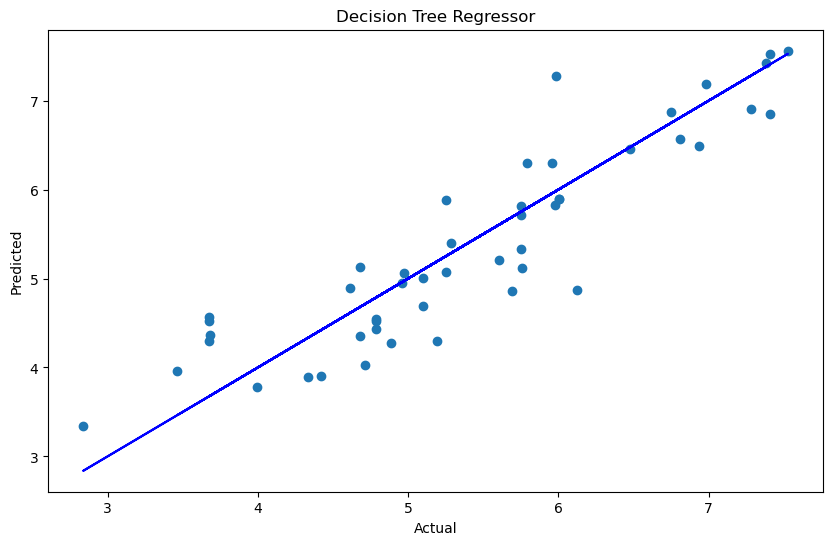

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(x=dtr_pred,y=y_test)
plt.plot(dtr_pred,dtr_pred,color = 'b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regressor')
plt.show()

#### Random Forest Regressor 

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_pred = rfr.predict(X_test)
print('R2_score:',r2_score(y_test,rfr_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,rfr_pred))
print('Mean Squared Error:',mean_squared_error(y_test,rfr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rfr_pred)))

R2_score: 0.9244324287004204
Mean Absolute Error: 0.22084270833333342
Mean Squared Error: 0.0946263003979167
Root Mean Squared Error: 0.3076138819980605


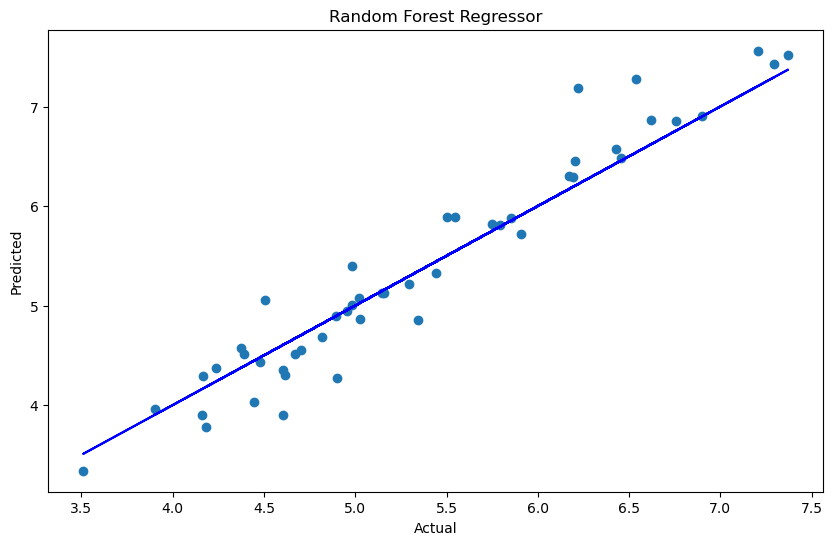

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(x=rfr_pred,y=y_test)
plt.plot(rfr_pred,rfr_pred,color = 'b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')
plt.show()

#### Lasso and Ridge Regressor 

In [65]:
from sklearn.linear_model import Lasso,Ridge

In [66]:
l = Lasso()
l.fit(X_train,y_train)
l_pred = l.predict(X_test)
print('R2_score:',r2_score(y_test,l_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,l_pred))
print('Mean Squared Error:',mean_squared_error(y_test,l_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,l_pred)))

R2_score: -0.0003051519474961406
Mean Absolute Error: 0.9563204545454543
Mean Squared Error: 1.2525898896831957
Root Mean Squared Error: 1.1191916233081785


In [67]:
r = Ridge()
r.fit(X_train,y_train)
r_pred = r.predict(X_test)
print('R2_score:',r2_score(y_test,r_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,r_pred))
print('Mean Squared Error:',mean_squared_error(y_test,r_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,r_pred)))

R2_score: 0.9798688687550526
Mean Absolute Error: 0.1283843899889624
Mean Squared Error: 0.02520835908543838
Root Mean Squared Error: 0.1587714051252252


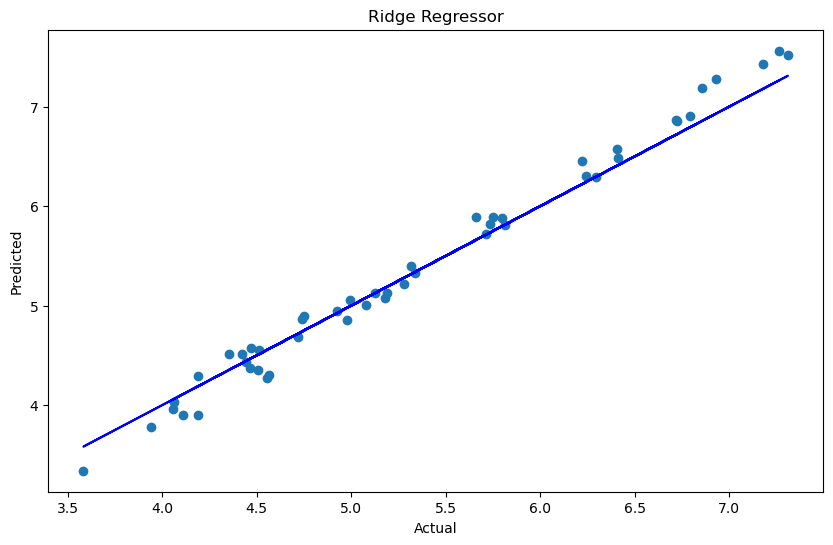

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(x=r_pred,y=y_test)
plt.plot(r_pred,r_pred,color = 'b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regressor')
plt.show()

Conclusion:

    1.) MAE,MSE and RMSE - These three methods measures the errors by calculating the difference between the predicted values and the actual value..so the lesser the better..and in the case of 
         a.) Linear Regression -  it is very very low as compared to all the above models..
         b.) Decision Tree Regressor - values are moderate compared to other models..
         c.) Random Forest Regressor - values are low but not as low compared to Linear Regression..(Third best)
         d.) Ridge Regressor - values are really low..lowest after Linear Regression...
    2.) r2 score - (coefficient of determination- ranges from 0 to 1)..in this case of..
           a.) Linear Regression - value is at 0.99 - which means 99% of variation in the target variable - best out of all the  models which we have tested for - and this is the model we shall be choosing for further prediction of values..
           b.) Decision Tree Regressor - value is at 0.79 - which means 79% of variation in the target variable..
       c.) Random Forest Regressor - value is at 0.92 - which means 92% of variation in the target variable(third best)..
           d.) Ridge Regressor - value is at 0.97 - which means 97% of variation in the target variable(second best)..


Therefore, we shall be choosing Linear Regression as our preferred model as it has the best r2 score and the lowest mean squared error and root mean squared error value..

## Saving the model 

In [75]:
Final_model = LinearRegression()

In [76]:
import joblib
joblib.dump(LR,"World_Happiness_indicator_project.pkl")

['World_Happiness_indicator_project.pkl']

In [77]:
model = joblib.load("World_Happiness_indicator_project.pkl")
prediction = model.predict(X_test)
prediction

array([5.12314186, 3.89649726, 6.29477466, 4.55060532, 7.42685948,
       4.94875771, 7.52215412, 6.48511376, 7.56083621, 4.51784514,
       4.51709321, 5.88902913, 4.85761668, 5.12419309, 4.86718577,
       3.90375816, 5.81254976, 3.78078981, 3.34005083, 6.57407906,
       4.35003093, 4.27061111, 6.45460141, 5.05724245, 4.43560972,
       6.3023378 , 5.87828494, 5.21198193, 6.90133798, 5.39865294,
       5.00703924, 5.71589175, 6.86715843, 4.3691977 , 5.82413974,
       5.07326002, 4.29675247, 6.85295515, 4.29250338, 3.95568554,
       7.27769592, 4.57146817, 5.88974833, 5.33252616, 7.18735769,
       4.89759322, 4.68556744, 4.03305573])

In [78]:
b = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = b
df

Predicted  Original
0    5.123142     5.123
1    3.896497     3.896
2    6.294775     6.295
3    4.550605     4.550
4    7.426859     7.427
5    4.948758     4.949
6    7.522154     7.522
7    6.485114     6.485
8    7.560836     7.561
9    4.517845     4.518
10   4.517093     4.517
11   5.889029     5.889
12   4.857617     4.857
13   5.124193     5.124
14   4.867186     4.867
15   3.903758     3.904
16   5.812550     5.813
17   3.780790     3.781
18   3.340051     3.340
19   6.574079     6.574
20   4.350031     4.350
21   4.270611     4.271
22   6.454601     6.455
23   5.057242     5.057
24   4.435610     4.436
25   6.302338     6.302
26   5.878285     5.878
27   5.211982     5.212
28   6.901338     6.901
29   5.398653     5.399
30   5.007039     5.007
31   5.715892     5.716
32   6.867158     6.867
33   4.369198     4.369
34   5.824140     5.824
35   5.073260     5.073
36   4.296752     4.297
37   6.852955     6.853
38   4.292503     4.292
39   3.955686     3.956
40   7.277696     7.278
41   4.571468     4.571
42   5.889748     5.890
43   5.332526     5.332
44   7.187358     7.187
45   4.897593     4.898
46   4.685567     4.686
47   4.033056     4.033

Text(0.5, 1.0, 'Actual vs Predicted values')

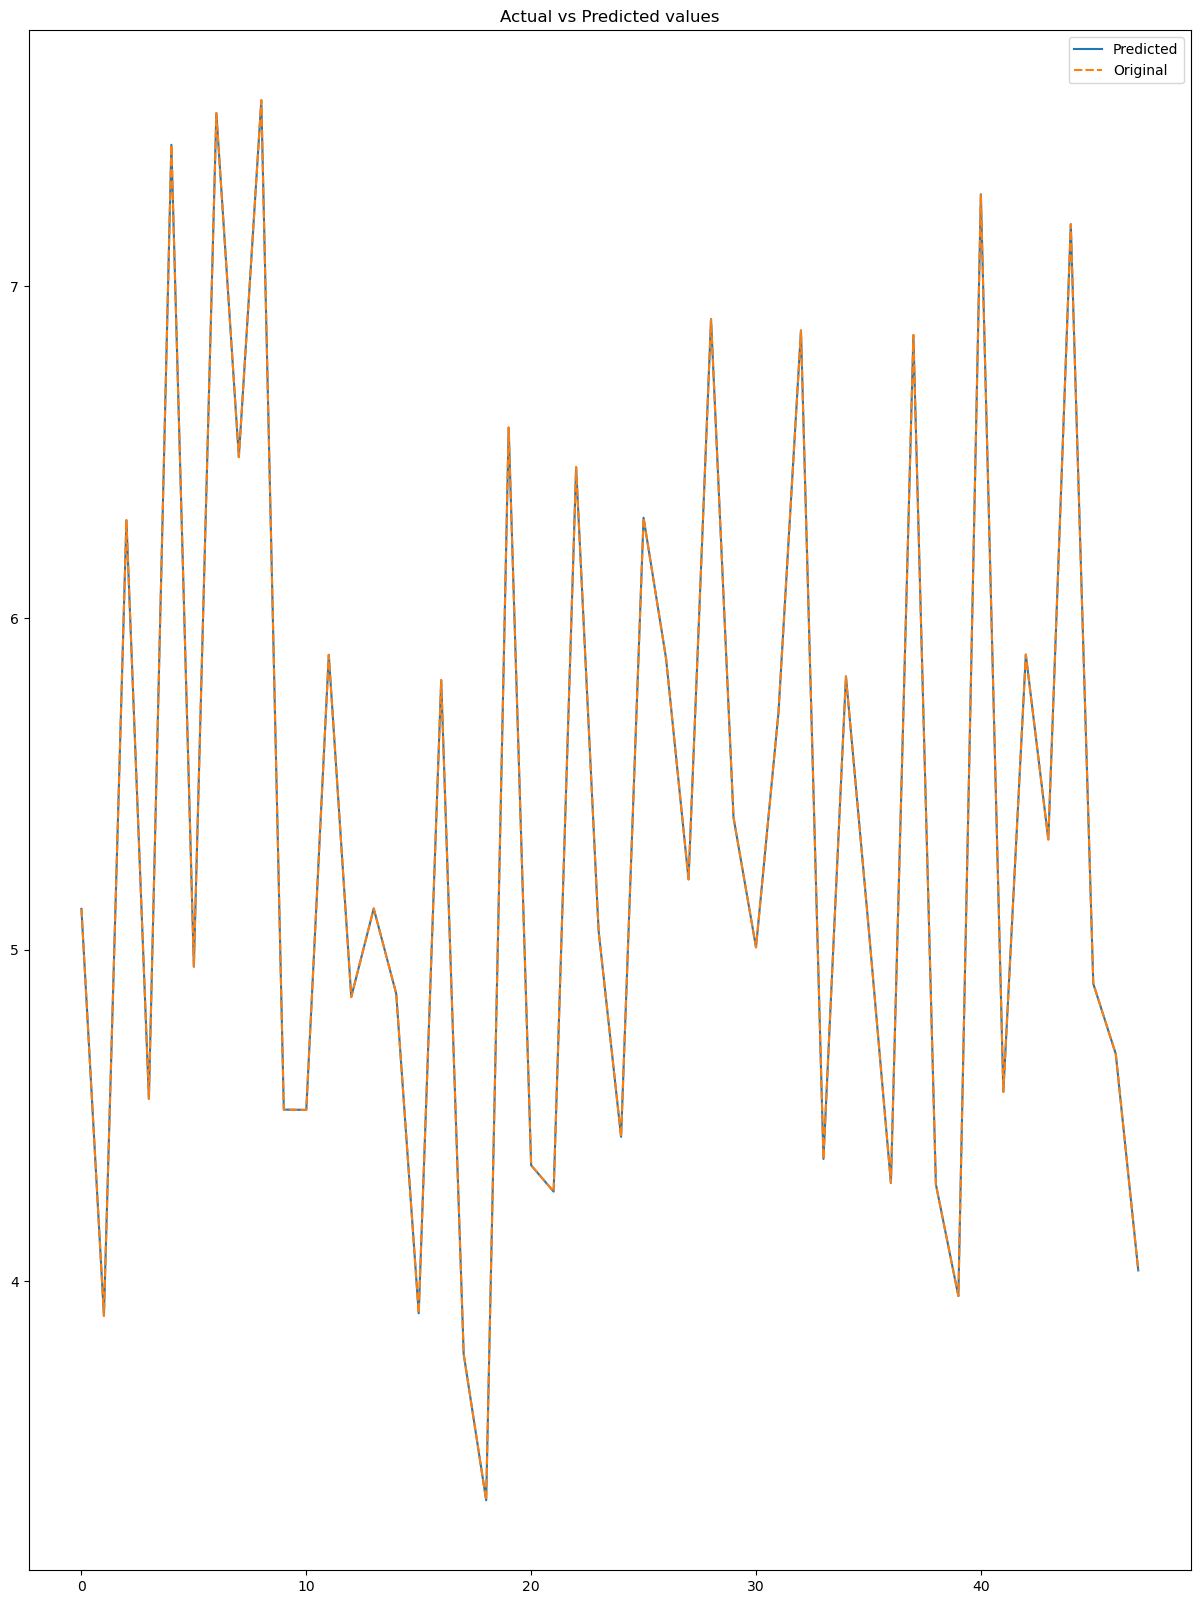

In [80]:
#Visually representing the actual vs predicted values..
plt.figure(figsize=(15,20))
sns.lineplot(data=df)
plt.title('Actual vs Predicted values')